In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv(r"C:\Python Project\Class_project\ML Project - Linear Regression Insurance Prediction 16955515670 (2).txt")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check null Value 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#data type inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Display a scatter plot between age and children

In [17]:

bins = [0, 18, 30, 45, 60, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior', 'Elder']

df['age_group'] = pd.cut(df["age"],bins=bins,labels=labels)
df[['age','age_group']].head()

,age,age_group
0,19,Young Adult
1,18,Teen
2,28,Young Adult
3,33,Adult
4,32,Adult


In [18]:
age_group_children = df.groupby('age_group')['children'].sum()
age_group_children


C:\Users\Harsh\AppData\Local\Temp\ipykernel_31028\3417921568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_children = df.groupby('age_group')['children'].sum()


age_group
Teen            31
Young Adult    342
Adult          572
Senior         460
Elder           60
Name: children, dtype: int64

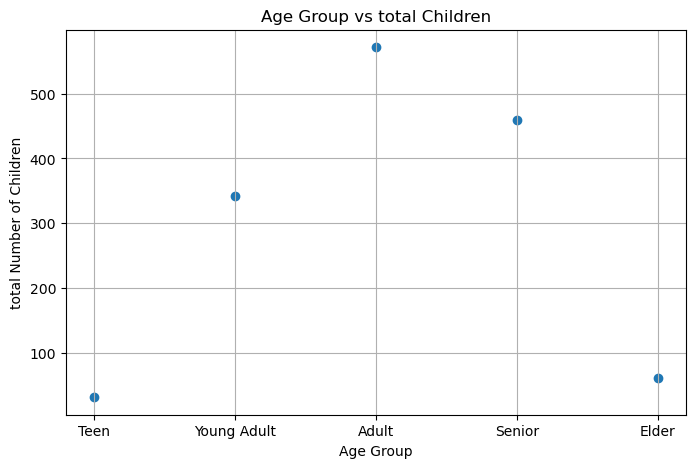

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(age_group_children.index, age_group_children.values)
plt.xlabel("Age Group")
plt.ylabel("total Number of Children")
plt.title("Age Group vs total Children")
plt.grid(True)
plt.show()

#### Display bar plot between BMI and children 

In [24]:
bim_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'obese']

df["bmi_group"] = pd.cut(df["bmi"],bins=bim_bins,labels=bmi_labels)
df[['bmi', 'bmi_group']].head()

,bmi,bmi_group
0,27.900,Overweight
1,33.770,obese
2,33.000,obese
3,22.705,Normal
4,28.880,Overweight


In [27]:
bmi_children = df.groupby('bmi_group')['children'].sum()
bmi_children

C:\Users\Harsh\AppData\Local\Temp\ipykernel_31028\3697785090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_children = df.groupby('bmi_group')['children'].sum()


bmi_group
Underweight     22
Normal         254
Overweight     408
obese          781
Name: children, dtype: int64

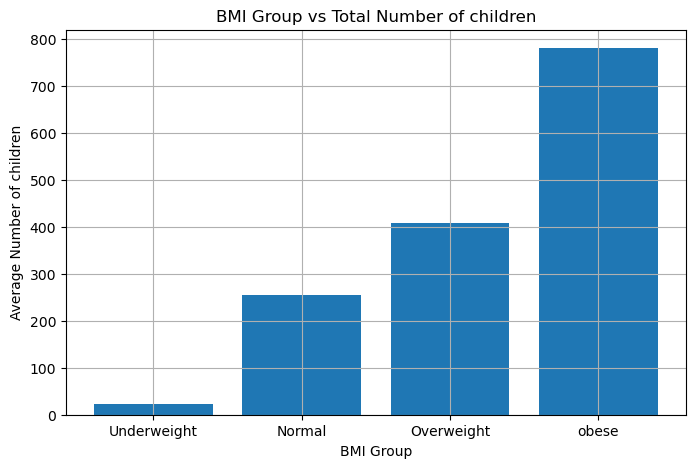

In [29]:
plt.figure(figsize=(8,5))
plt.bar(bmi_children.index,bmi_children.values)
plt.xlabel('BMI Group')
plt.ylabel('Average Number of children')
plt.title("BMI Group vs Total Number of children")
plt.grid(True)
plt.show()

In [36]:
df.drop(['age_group','bmi_group'],axis=1,inplace=True)

#### Perform encoding to convert character data into numerical data 

In [12]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [39]:
df = pd.get_dummies(df,drop_first=True,dtype=int)

In [42]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


#### Perform scaling

In [43]:
# Scalling data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df_ss = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_ss.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


##### Separate feature data from target data 

In [44]:
X = df_ss.drop("charges",axis=1)
y = df_ss['charges']

In [47]:
X.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418


In [48]:
y.head(2)

0    0.298584
1   -0.953689
Name: charges, dtype: float64

In [49]:
#random_state Controls the shuffling applied to the data before applying the splite
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state=42)

In [50]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1253,0.056461,-0.223658,2.410772,-1.010519,-0.507463,-0.566418,-0.611324,1.765481
765,1.266881,0.190555,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
700,-1.296362,0.690070,-0.908614,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
1119,-0.655551,-1.757474,1.580926,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
1108,-0.940356,-0.108827,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481


In [51]:
y_train.head()

1253    0.211342
765    -0.117946
700    -0.929320
1119   -0.625914
1108   -0.856334
Name: charges, dtype: float64

In [52]:
from sklearn.linear_model import LinearRegression 
mod = LinearRegression()
mod.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
y_pred = mod.predict(x_test)

In [75]:
y_train_pred = mod.predict(X_train)

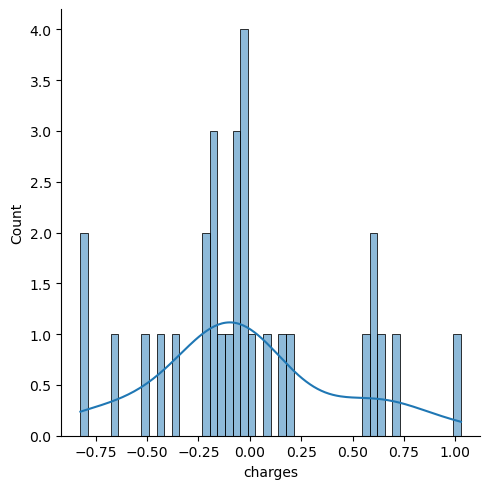

In [82]:
sns.displot((y_test-y_pred),bins =50,kde =True)
plt.show()

### Model Evulations

In [71]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [74]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.1900854894469001
MAE: 0.32571518230333923


#### Display Training Score & Test Score (R²)

In [79]:
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_pred)

print("Training R² Score",train_score)
print("Testing R² Score",test_score)

Training R² Score 0.7473340328709034
Testing R² Score 0.8598188970664264


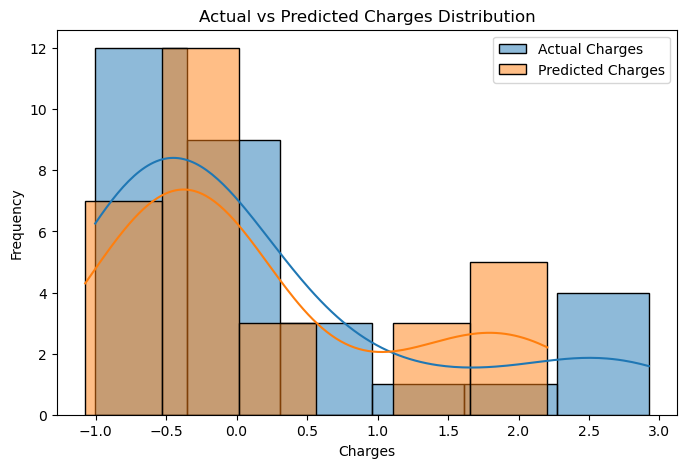

In [80]:
plt.figure(figsize=(8,5))

sns.histplot(y_test, kde=True, label="Actual Charges")
sns.histplot(y_pred, kde=True, label="Predicted Charges")

plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Actual vs Predicted Charges Distribution")
plt.legend()
plt.show()